In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib
import matplotlib.font_manager as font_manager
import pandas as pd
import numpy as np
import codecs
import argparse
import math
from scipy.special import comb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import scipy.integrate as integrate
from scipy.integrate import quad
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from math import floor, log10

# ==============================================================================
# Chart variables
# ==============================================================================
titlesize = 16
subtitlesize = 14
labelsize = 14
axessize = 12
legendsize = 11
markersize = 5

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rcParams.update({'font.size': BIGGER_SIZE})
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# http://scipy-cookbook.readthedocs.io/items/Matplotlib_LaTeX_Examples.html
plt.rcParams.update(plt.rcParamsDefault)
# plt.style.use('grayscale')
# plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
font = font_manager.FontProperties(family='serif', size=legendsize)

# Markers - https://matplotlib.org/api/markers_api.html
markers = ["v", "^", "<", ">", "8", "s", "p", "P", "*", "+", "X", "D", "o", "s"]
greyscale = ['silver', 'grey', 'lightgrey', 'black']

# Lines - https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html

# =============================================================================
# Location String	Location Code
# 'best'	0
# 'upper right'	1
# 'upper left'	2
# 'lower left'	3
# 'lower right'	4
# 'right'	5
# 'center left'	6
# 'center right'	7
# 'lower center'	8
# 'upper center'	9
# 'center'	10
# =============================================================================

# =============================================================================
# These are the "Tableau 20" colors as RGB.
# http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/
# =============================================================================
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)

# ==============================================================================
# datasets = ["Foodmart", "SSB"]  # ["dataset_patrick", "dataset_patrick_ssb"]
# data = pd.DataFrame()
# with codecs.open(path + filename, 'r', encoding='utf-8') as f:
#     data = pd.read_csv(f, sep=';')
#     # data.infer_objects()
# data["dataset"] = data["dataset"].apply(lambda x: "SSB" if "ssb" in x else "Foodmart")
# data["synMeta"] = data["synMeta"] + 1
# msize, m, ls, l, c = marker(filename)

# You typically want your plot to be ~1.33x wider than tall. This plot is a rare
# exception because of the number of lines being plotted on it.
# Common sizes: (10, 7.5) and (12, 9)
# Make room for the ridiculously large title.
# plt.subplots_adjust(top=0.8)
figsize11 = (4, 3)
figsize12 = (8, 3)
figsize13 = (12, 3)
figsize22 = (8, 6)
col_width=0.15

def default_plotsetup(ax):
    ax.grid(color="lightgray", linestyle='-', linewidth=0.3)
    ax.set_axisbelow(True)

In [2]:
df1 = pd.read_csv('../../../../results/PFPGrowth_stats.csv')
df1

,time(ms),intable,minsize,minsup,nitemsets,repfreq,limit,nexecutors,ncores,maxram,timescale,bint,epst,bins,epss,semf
0,293507,trajectory.hermopoulis_standard1_200,10,20,240828256,1,1000000,10,2,8g,absolute,60,inf,19,inf,NaN
1,970417,trajectory.hermopoulis_standard1_200,10,19,638572748,1,1000000,10,2,8g,absolute,60,inf,19,inf,NaN
2,2697742,trajectory.hermopoulis_standard1_200,10,18,1819299840,1,1000000,10,2,8g,absolute,60,inf,19,inf,NaN
3,7219749,trajectory.hermopoulis_standard1_200,10,17,5665424404,1,1000000,10,2,8g,absolute,60,inf,19,inf,NaN
4,9600000,trajectory.hermopoulis_standard1_200,10,16,5665424404,1,1000000,10,2,8g,absolute,60,inf,19,inf,NaN
5,4841,trajectory.oldenburg_standard_2000_distinct,10,35,26464,1,1000000,10,2,8g,absolute,1,inf,20,inf,NaN
6,3602,trajectory.oldenburg_standard_2000_distinct,10,34,33488,1,1000000,10,2,8g,absolute,1,inf,20,inf,NaN
7,3577,trajectory.oldenburg_standard_2000_distinct,10,35,26464,1,1000000,10,2,8g,absolute,1,inf,20,inf,NaN
8,3696,trajectory.oldenburg_standard_2000_distinct,10,34,33488,1,1000000,10,2,8g,absolute,1,inf,20,inf,NaN
9,15090,trajectory.oldenburg_standard_2000_distinct,10,25,7259824,1,1000000,10,2,8g,absolute,1,inf,20,inf,NaN


In [3]:
df2 = pd.read_csv('../../../../results/CTM_stats.csv')
df2

,time(ms),brdneighborhoodbytes,brdtrajincellbytes,ntransactions,intable,minsize,minsup,nitemsets,storagethr,repfreq,...,bint,epst,bins,epss,exploredpatterns,exploredpatterns2,accmlen,accmcrd,accmsup,semf
0,259008,0,6341186,359,trajectory.milan_standard,100,12,2290,1000000,1,...,4,inf,16,inf,10198458,608770786,0.0,0.0,0.0,NaN
1,64482,0,1413250,60,trajectory.milan_standard,100,12,521062,1000000,1,...,1,inf,16,inf,5767220,41545601,0.0,0.0,0.0,NaN
2,265460,0,6341186,359,trajectory.milan_standard,100,12,2290,1000000,1,...,4,inf,16,inf,10198458,608770786,0.0,0.0,0.0,NaN
3,44797,1496,1413250,60,trajectory.milan_standard,100,12,194273,1000000,1,...,1,inf,16,1.0,3176311,32537537,0.0,0.0,0.0,NaN
4,423450,0,6341684,360,trajectory.milan_standard,75,12,20449,1000000,1,...,4,inf,16,inf,21716656,1224146551,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,31919,0,263916,3552,trajectory.oldenburg_standard_2000_distinct,10,21,1766,1000000,1,...,1,inf,20,inf,75692,168210981,0.0,0.0,0.0,none
213,27475,0,265732,3576,trajectory.oldenburg_standard_2000_distinct,10,20,2294,1000000,1,...,1,inf,20,inf,76230,170467394,0.0,0.0,0.0,none
214,44698,0,272116,3639,trajectory.oldenburg_standard_2000_distinct,10,15,8566,1000000,1,...,1,inf,20,inf,77804,176613228,0.0,0.0,0.0,none
215,47473,0,274468,3659,trajectory.oldenburg_standard_2000_distinct,10,10,25778,1000000,1,...,1,inf,20,inf,78153,177577343,0.0,0.0,0.0,none


In [4]:
[x for x in df1.columns if x not in ["time(ms)", "semf", "nitemsets"]]

['intable',
 'minsize',
 'minsup',
 'repfreq',
 'limit',
 'nexecutors',
 'ncores',
 'maxram',
 'timescale',
 'bint',
 'epst',
 'bins',
 'epss']

In [5]:
df4 = pd.read_csv('../../../../results/SPARE_stats.csv')
df4 = df4.rename({'m': 'minsize', 'k': 'minsup', 'validpatterns': 'nitemsets'}, axis=1)
df4

,intable,minsize,minsup,l,g,time(ms),exploredpatterns,nitemsets
0,trajectory.oldenburg_standard_2000_distinct,10,35,1,10000,46097,358868,13
1,trajectory.oldenburg_standard_2000_distinct,10,34,1,10000,41098,490798,17
2,trajectory.oldenburg_standard_2000_distinct,10,33,1,10000,38480,720152,20
3,trajectory.oldenburg_standard_2000_distinct,10,32,1,10000,39949,1002582,27
4,trajectory.oldenburg_standard_2000_distinct,10,31,1,10000,39784,1676802,42
5,trajectory.oldenburg_standard_2000_distinct,10,30,1,10000,41149,2462234,48
6,trajectory.oldenburg_standard_2000_distinct,10,29,1,10000,41943,3555389,64
7,trajectory.oldenburg_standard_2000_distinct,10,28,1,10000,51588,8478922,92
8,trajectory.oldenburg_standard_2000_distinct,10,27,1,10000,53729,16833985,103
9,trajectory.oldenburg_standard_2000_distinct,10,26,1,10000,83662,38257059,134


In [10]:
l = [x for x in df1.columns if x in ['intable', 'epss', 'bins', 'epst', 'bint', 'maxram', 'ncores', 'intable', 'minsize', 'minsup', 'repfreq',  'limit', 'nexecutors',]] 
df3 = df2.merge(df1, on=l, how='left').merge(df4, how='left', on=['intable', 'minsize', 'minsup'])
df3 = df3.sort_values("minsup")
df3

,time(ms)_x,brdneighborhoodbytes,brdtrajincellbytes,ntransactions,intable,minsize,minsup,nitemsets_x,storagethr,repfreq,...,semf_x,time(ms)_y,nitemsets_y,timescale_y,semf_y,l,g,time(ms),exploredpatterns_y,nitemsets
200,752072,14968,75268,202,trajectory.hermopoulis_standard_1000,10,1,9413175,1000000,1,...,MOBILITY-PLACE-ACTIVITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,17332,0,38406,60,trajectory.hermopoulis_standard_1000,10,1,25276,1000000,1,...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,13513,0,5102,41,trajectory.milan_standard_1000,10,1,154,1000000,1,...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,12463,0,23936,82,trajectory.oldenburg_standard_1000,10,1,2984,1000000,1,...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,39071,0,275526,3674,trajectory.oldenburg_standard_2000_distinct,10,5,58407,1000000,1,...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,21025,0,236902,3302,trajectory.oldenburg_standard_2000_distinct,10,34,24,1000000,1,...,none,3602.0,33488.0,absolute,NaN,1.0,10000.0,41098.0,490798.0,17.0
202,23892,0,231174,3228,trajectory.oldenburg_standard_2000_distinct,10,35,14,1000000,1,...,none,3577.0,26464.0,absolute,NaN,1.0,10000.0,46097.0,358868.0,13.0
201,23892,0,231174,3228,trajectory.oldenburg_standard_2000_distinct,10,35,14,1000000,1,...,none,4841.0,26464.0,absolute,NaN,1.0,10000.0,46097.0,358868.0,13.0
62,21362,0,231174,3228,trajectory.oldenburg_standard_2000_distinct,10,35,14,1000000,1,...,NaN,4841.0,26464.0,absolute,NaN,1.0,10000.0,46097.0,358868.0,13.0


In [7]:
df3.columns

Index(['time(ms)_x', 'intable', 'minsize', 'minsup', 'nitemsets_x', 'repfreq',
       'limit', 'nexecutors', 'ncores', 'maxram', 'timescale_x', 'bint',
       'epst', 'bins', 'epss', 'semf_x', 'time(ms)_y', 'brdneighborhoodbytes',
       'brdtrajincellbytes', 'ntransactions', 'nitemsets_y', 'storagethr',
       'timescale_y', 'exploredpatterns_x', 'exploredpatterns2', 'accmlen',
       'accmcrd', 'accmsup', 'semf_y', 'l', 'g', 'time(ms)',
       'exploredpatterns_y', 'nitemsets'],
      dtype='object')

In [11]:
df3['time(ms)_x'] = df3['time(ms)_x'] / 1000
df3['time(ms)_y'] = df3['time(ms)_y'] / 1000
df3['time(ms)'] = df3['time(ms)'] / 1000
df3

,time(ms)_x,brdneighborhoodbytes,brdtrajincellbytes,ntransactions,intable,minsize,minsup,nitemsets_x,storagethr,repfreq,...,semf_x,time(ms)_y,nitemsets_y,timescale_y,semf_y,l,g,time(ms),exploredpatterns_y,nitemsets
200,752.072,14968,75268,202,trajectory.hermopoulis_standard_1000,10,1,9413175,1000000,1,...,MOBILITY-PLACE-ACTIVITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,17.332,0,38406,60,trajectory.hermopoulis_standard_1000,10,1,25276,1000000,1,...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,13.513,0,5102,41,trajectory.milan_standard_1000,10,1,154,1000000,1,...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,12.463,0,23936,82,trajectory.oldenburg_standard_1000,10,1,2984,1000000,1,...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,39.071,0,275526,3674,trajectory.oldenburg_standard_2000_distinct,10,5,58407,1000000,1,...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,21.025,0,236902,3302,trajectory.oldenburg_standard_2000_distinct,10,34,24,1000000,1,...,none,3.602,33488.0,absolute,NaN,1.0,10000.0,41.098,490798.0,17.0
202,23.892,0,231174,3228,trajectory.oldenburg_standard_2000_distinct,10,35,14,1000000,1,...,none,3.577,26464.0,absolute,NaN,1.0,10000.0,46.097,358868.0,13.0
201,23.892,0,231174,3228,trajectory.oldenburg_standard_2000_distinct,10,35,14,1000000,1,...,none,4.841,26464.0,absolute,NaN,1.0,10000.0,46.097,358868.0,13.0
62,21.362,0,231174,3228,trajectory.oldenburg_standard_2000_distinct,10,35,14,1000000,1,...,NaN,4.841,26464.0,absolute,NaN,1.0,10000.0,46.097,358868.0,13.0


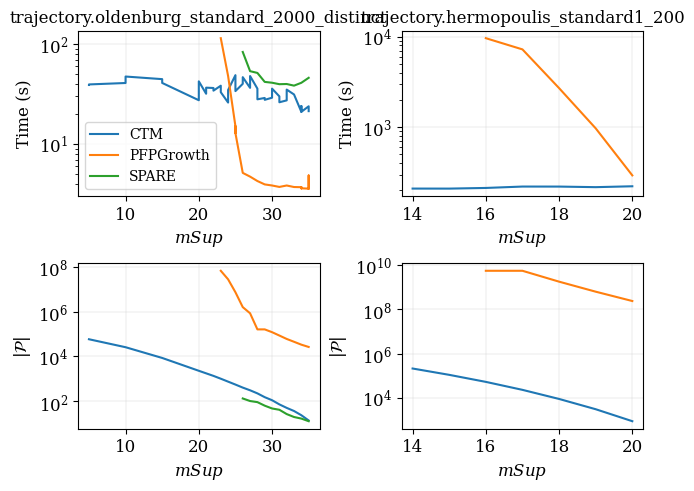

In [14]:
c = ["trajectory.oldenburg_standard_2000_distinct", "trajectory.hermopoulis_standard1_200"]
col = len(c)
fig, ax = plt.subplots(2, col, constrained_layout=True)
for i, intable in enumerate(c):
    axs = ax[0][i] if col > 1 else ax[0]
    df3[df3["intable"] == intable].rename(columns={'time(ms)_y': 'PFPGrowth', 'time(ms)': 'SPARE', 'time(ms)_x': 'CTM', 'minsup': '$mSup$'}).plot(fontsize=BIGGER_SIZE, ax=axs, x='$mSup$', y=['CTM', 'PFPGrowth', 'SPARE'], logy=True, legend=i == 0)
    default_plotsetup(axs)
    axs.set_title(intable)
    axs.set_ylabel('Time (s)', fontsize=BIGGER_SIZE)
    axs.set_xlabel('$mSup$', fontsize=BIGGER_SIZE)
    
    axs = ax[1][i] if col > 1 else ax[1]
    df3[df3["intable"] == intable].rename(columns={'nitemsets_y': 'PFPGrowth', 'nitemsets': 'SPARE', 'nitemsets_x': 'CTM', 'minsup': '$mSup$'}).plot(fontsize=BIGGER_SIZE, ax=axs, x='$mSup$', y=['CTM', 'PFPGrowth', 'SPARE'], logy=True, legend=False)
    default_plotsetup(axs)
    axs.set_ylabel('$|\mathcal{P}|$', fontsize=BIGGER_SIZE)
    axs.set_xlabel('$mSup$',          fontsize=BIGGER_SIZE)
    # fig.savefig('../../../../output/pfpgrowth-time.svg')
fig